In [74]:
from standardInclude import *

In [75]:
f = r.TFile("syncPulseEnergiesRun23609TQBankFitsCalibrated.root")
f.cd("syncPulseEnergies/calo1")
f.ls()

TFile**		syncPulseEnergiesRun23609TQBankFitsCalibrated.root	
 TFile*		syncPulseEnergiesRun23609TQBankFitsCalibrated.root	
  TDirectoryFile*		syncPulseEnergies	syncPulseEnergies (SyncPulseEnergyExtraction) folder
   TDirectoryFile*		calo1	calo1
    KEY: TH1D	calo1xtal0;1	calo 1 crystal 0
    KEY: TH1D	calo1xtal1;1	calo 1 crystal 1
    KEY: TH1D	calo1xtal2;1	calo 1 crystal 2
    KEY: TH1D	calo1xtal3;1	calo 1 crystal 3
    KEY: TH1D	calo1xtal4;1	calo 1 crystal 4
    KEY: TH1D	calo1xtal5;1	calo 1 crystal 5
    KEY: TH1D	calo1xtal6;1	calo 1 crystal 6
    KEY: TH1D	calo1xtal7;1	calo 1 crystal 7
    KEY: TH1D	calo1xtal8;1	calo 1 crystal 8
    KEY: TH1D	calo1xtal9;1	calo 1 crystal 9
    KEY: TH1D	calo1xtal10;1	calo 1 crystal 10
    KEY: TH1D	calo1xtal11;1	calo 1 crystal 11
    KEY: TH1D	calo1xtal12;1	calo 1 crystal 12
    KEY: TH1D	calo1xtal13;1	calo 1 crystal 13
    KEY: TH1D	calo1xtal14;1	calo 1 crystal 14
    KEY: TH1D	calo1xtal15;1	calo 1 crystal 15
    KEY: TH1D	calo1xtal16;1	calo 1 cryst

Starting calo 1
Starting calo 2
Starting calo 3
Starting calo 4
Starting calo 5
Starting calo 6
Starting calo 7
Starting calo 8
Starting calo 9
Starting calo 10
Starting calo 11
Starting calo 12
Starting calo 13
Starting calo 14
Starting calo 15
    Bad xtal 15 2
Starting calo 16
Starting calo 17
Starting calo 18
Starting calo 19
Starting calo 20
Starting calo 21
Starting calo 22
Starting calo 23
Starting calo 24


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/SyncPulseEnergies_Calo01_Xtal53.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/SyncPulseEnergies_Calo02_Xtal53.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/SyncPulseEnergies_Calo03_Xtal53.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/SyncPulseEnergies_Calo04_Xtal53.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/SyncPulseEnergies_Calo05_Xtal53.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/SyncPulseEnergies_Calo06_Xtal53.png has been created
Warn

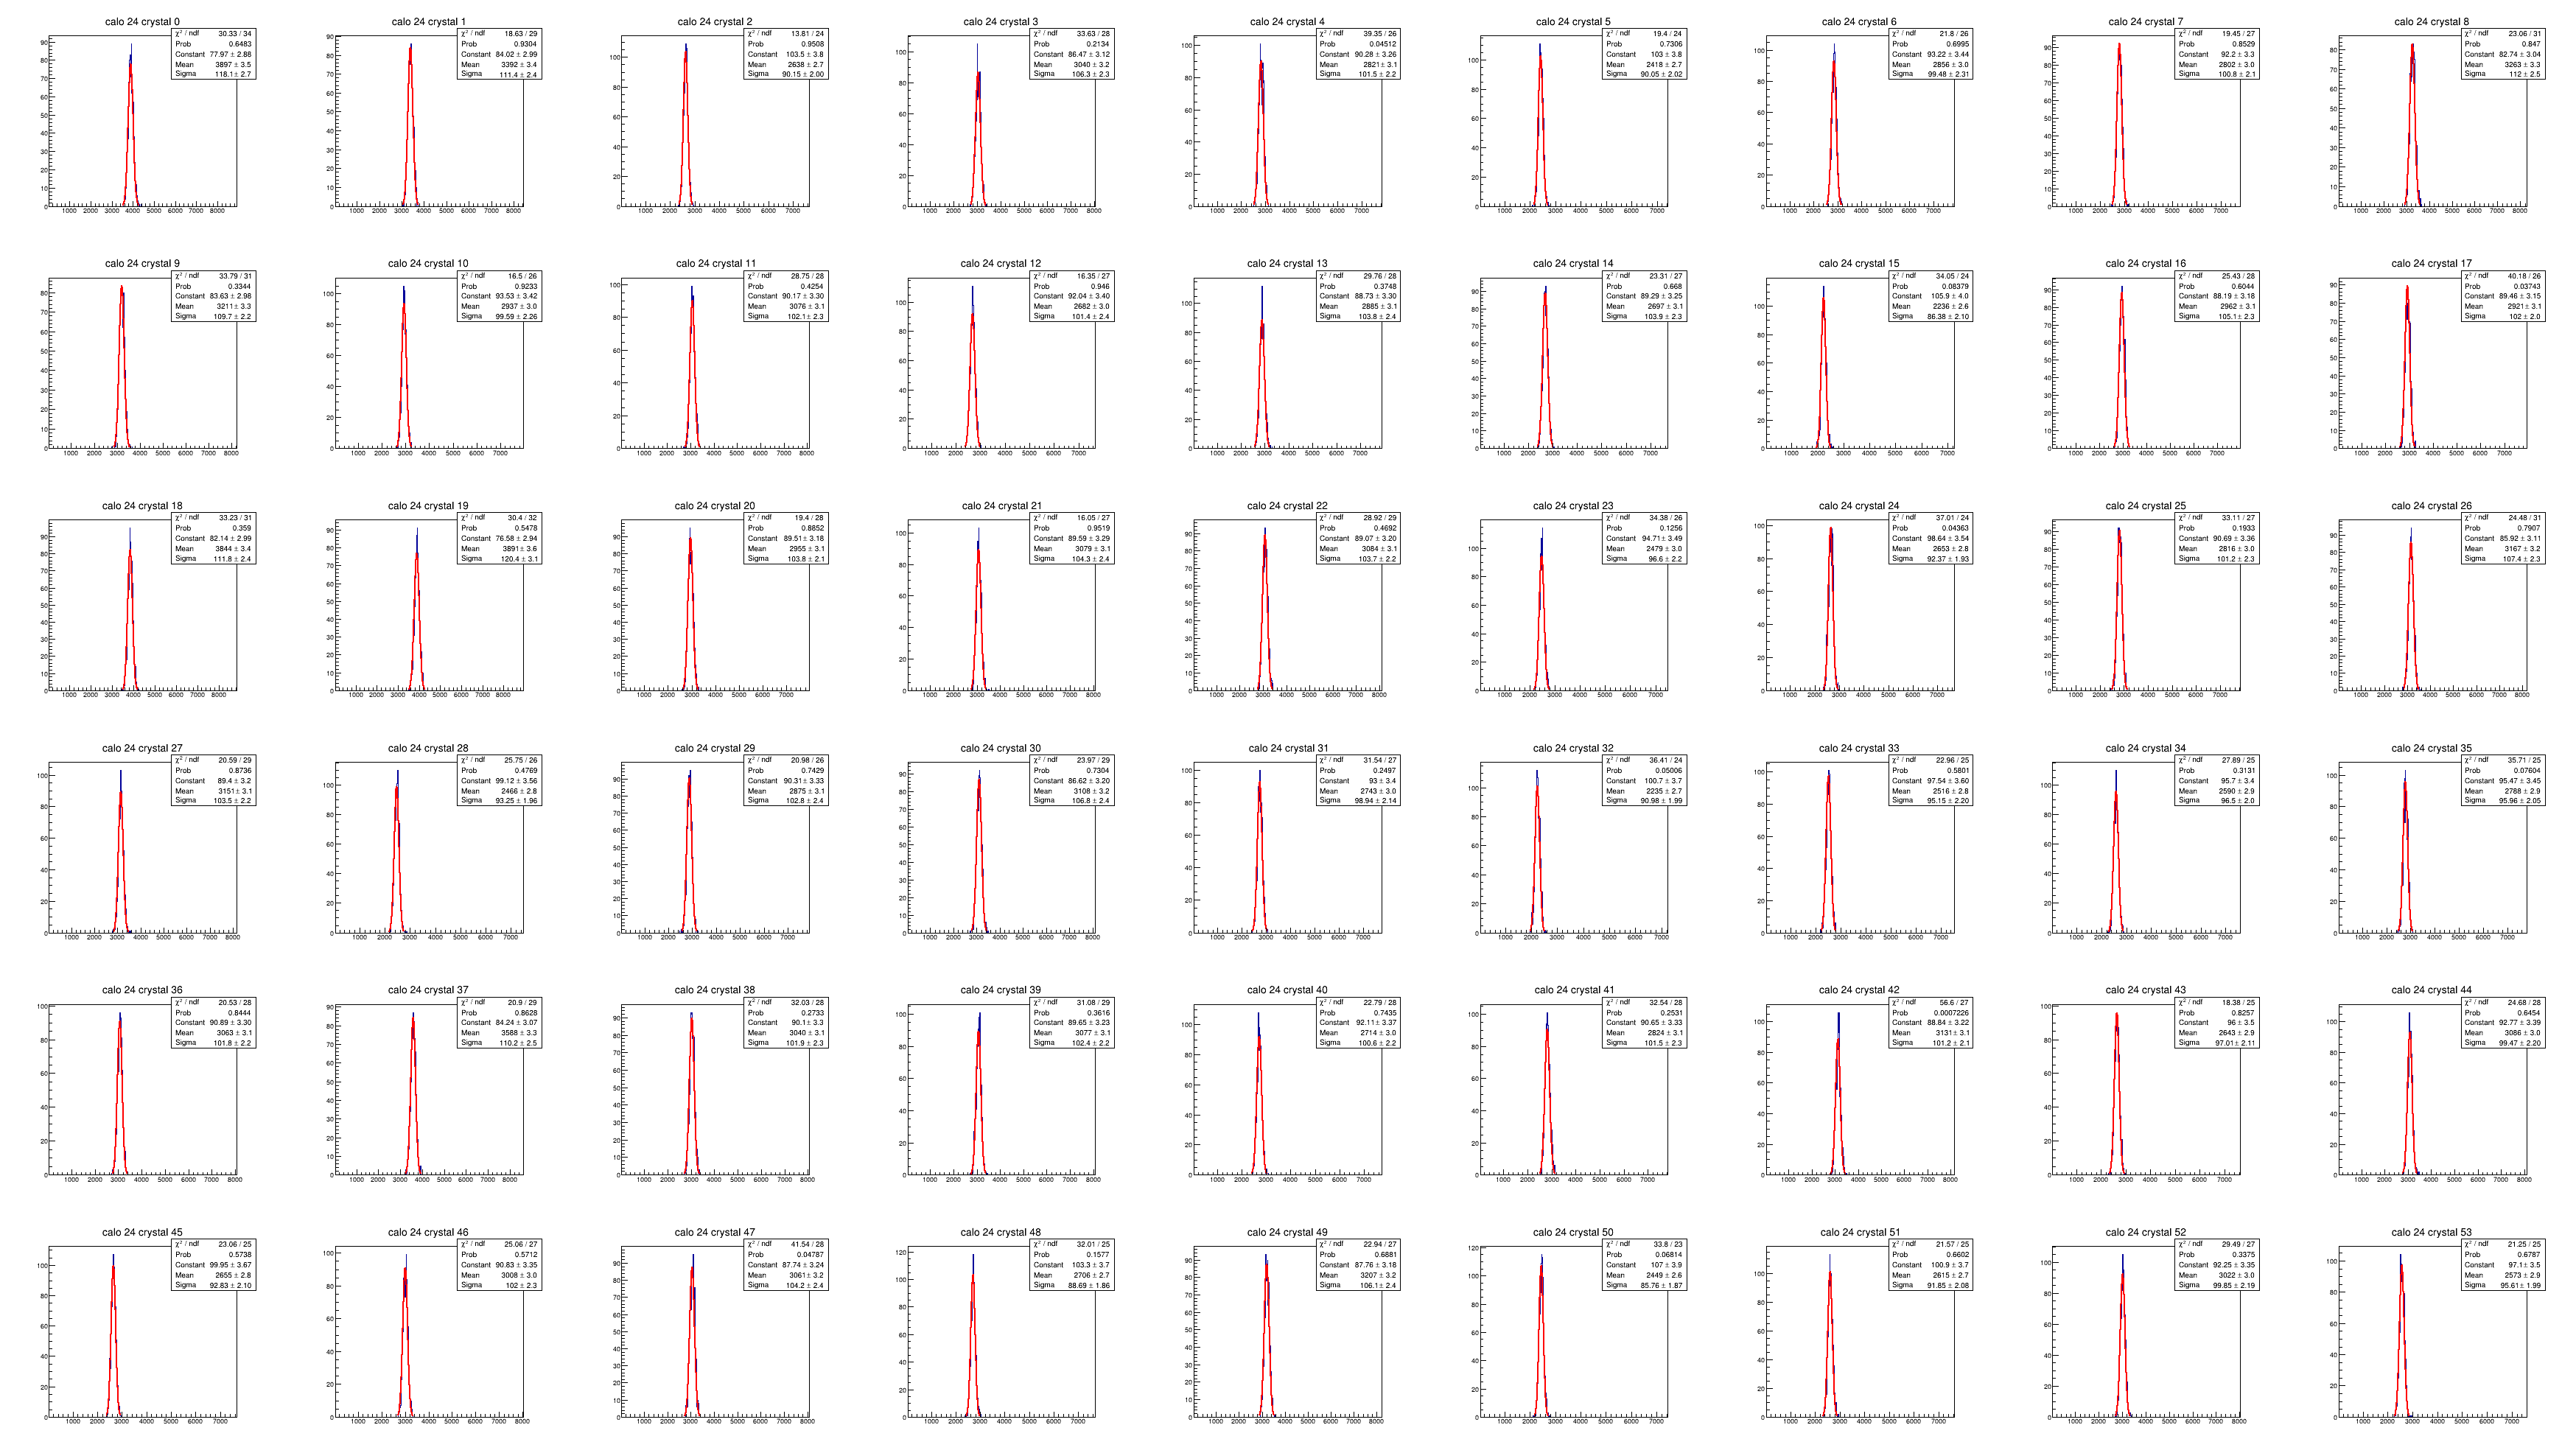

In [76]:
allPars = []

for calo in range(1,25):
    print("Starting calo", calo)
    c = r.TCanvas("c","c",3500,2000)
    c.Divide(9,6)
    for xtal in range(54):
        hi = f.Get("syncPulseEnergies/calo"+str(calo)+"/calo"+str(calo)+"xtal"+str(xtal)).Clone("hi")
        nPulses = hi.Integral()
        try:
            func = hi.GetFunction("gaus")
            mean = func.GetParameter(1)
            hi.GetXaxis().SetRangeUser( mean - 5000, mean + 5000 )
            allPars.append((calo, 
                            xtal, 
                            nPulses,
                            [func.GetParameter(i) for i in range(3)], 
                            [func.GetParError(i) for i in range(3)], 
                            [func.GetChisquare(), func.GetNDF()]))
        except:
            print("    Bad xtal", calo, xtal)
        c.cd(xtal+1)
        hi.DrawCopy()
    c.Draw()
    c.Print("./images/SyncPulseEnergies_Calo"+str(calo).zfill(2)+"_Xtal"+str(xtal).zfill(2)+".png")

In [77]:
calos, xtals, pulses, params, parErrs, chiSq = zip(*allPars)
globalXtals = [(caloi -1)*54 + xtali for caloi,xtali in zip(calos,xtals)]
norms, means, sigmas = zip(*params)
normErrs, meanErrs, sigmaErrs = zip(*parErrs)
chiSqOverNDF = [x/y for x,y in chiSq]

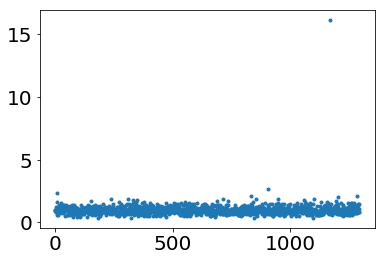

In [78]:
plt.plot(chiSqOverNDF,".")
plt.show()

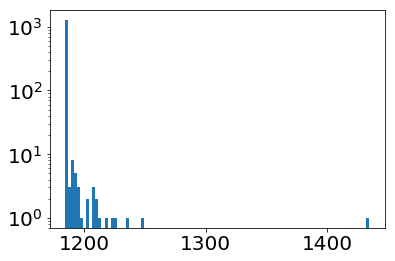

In [79]:
plt.hist(pulses,bins=100)
plt.yscale("log")
plt.show()

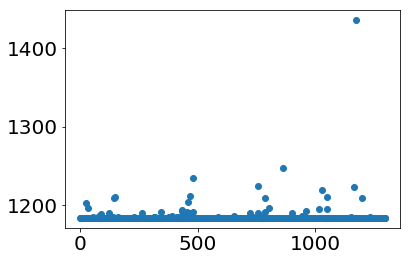

In [80]:
plt.scatter(globalXtals,pulses)
plt.show()

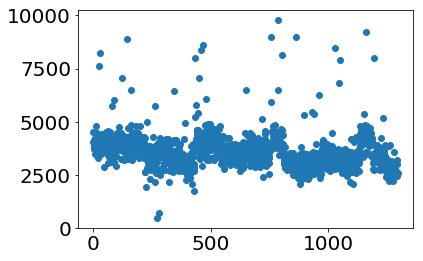

In [81]:
plt.scatter(globalXtals,means)
plt.show()